# Task 1

In [344]:
import numbers
import random
import numpy as np
from scipy import stats
from matplotlib import pyplot
from numpy import mean, var, std
from collections import Counter


SEED = 9430


def get_random_nums(n):
    random.seed(SEED)
    numbers = [random.random() for _ in range(n)]
    return numbers


def get_interval_mu(conf, mu, sigma, n):
    t = stats.t.ppf(conf, n - 1) # Critical value (from "table")
    delta = t * sigma / np.sqrt(n)

    left_border = mu - delta
    right_border =  mu + delta
    
    return left_border, right_border


def get_interval_sigma(conf, sigma, n):
    alpha1 = (1 - conf) / 2.0
    alpha2 = (1 + conf) / 2.0

    left_border = np.sqrt((n - 1) / stats.chi2.ppf(alpha2, n - 1)) * sigma
    right_border = np.sqrt((n - 1) / stats.chi2.ppf(alpha1, n - 1)) * sigma

    return left_border, right_border


def chi2_test(theor, emp, conf, num_of_intervals):
    n = len(theor)
    result = 0

    for i in range(n):
        result = result + ((theor[i] - emp[i]) ** 2) / theor[i]
    result *= n

    chi2_crit = stats.chi2.ppf(conf, num_of_intervals)

    if result < chi2_crit: return f"PASSED ({result} < {chi2_crit})"
    else: return f"Failed ({result} > {chi2_crit})"


### Uniform distribution

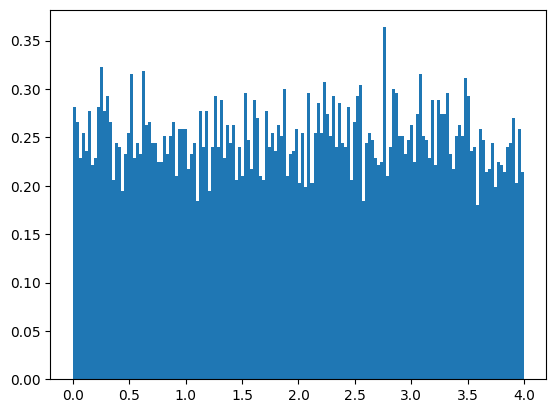

Expected value: 1.9927083639071164
Dispersion: 1.323745413636775
Standard deviation: 1.1505413567694014

Expected value interval (with 0.95% confidence): (1.973781889172518, 2.0116348386417147)
Standard deviation interval (with 0.95% confidence): (1.134814880217014, 1.1667129619787513)

Chi2 test (with 0.95% confidence): PASSED (92.51941976243316 < 119.97855311324912)


In [381]:
def get_uniform_nums(a, b, n):
    numbers = get_random_nums(n)

    for i in range(n):
        numbers[i] = (b - a) * numbers[i] + a
    
    return numbers


def u_f(a, b):
    return 1.0 / (b - a)


def get_u_theor(a, b, n):
    theor = []

    for _ in range(n):
        theor.append(u_f(a, b))

    return theor


def uniform_distribution():
    n = 10 ** 4
    a = 0
    b = 4
    n_bins = 150
    conf = 0.95

    numbers = get_uniform_nums(a, b, n)
    probs, _, _ = pyplot.hist(numbers, bins=n_bins, density=True)
    pyplot.show()

    u_mean = mean(numbers)
    u_var = var(numbers)
    u_std = std(numbers)
    print("Expected value:", u_mean)
    print("Dispersion:", u_var)
    print("Standard deviation:", u_std)

    print()

    mu_left_border, mu_right_border = get_interval_mu(conf, u_mean, u_std, n)
    sigma_left_border, sigma_right_border = get_interval_sigma(conf, u_std, n)
    print(f"Expected value interval (with {conf}% confidence):", (mu_left_border, mu_right_border))
    print(f"Standard deviation interval (with {conf}% confidence):", (sigma_left_border, sigma_right_border))

    print()

    theor = get_u_theor(a, b, len(probs))
    result = chi2_test(theor, probs, 1 - conf, n_bins - 3)
    print(f"Chi2 test (with {conf}% confidence):", result)

uniform_distribution()

# Task 2 Var. 25

### Power distribution

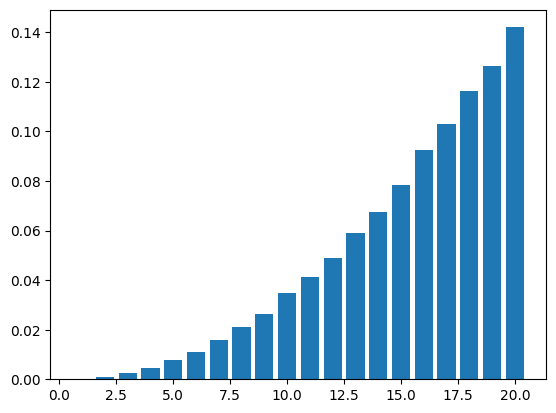

Expected value: 15.49038
Dispersion: 14.9004474556
Standard deviation: 3.86010977248057

Expected value interval (with 0.99% confidence): (15.461982423702722, 15.518777576297278)
Standard deviation interval (with 0.99% confidence): (3.8379954720416585, 3.8824632432852706)

Chi2 test (with 0.99% confidence): PASSED (0.03306528707576831 < 6.407759777738935)


In [385]:
def get_power_distr_vals(a, b, bins, c):
    vals = {}
    step = (b - a) / bins

    for i in range(bins):
        x = a + step * i 
        vals[x] = (c * x ** (c - 1)) # x : denstity

    n = sum(list(vals.values())) # Normalizing
    for key in vals:
        vals[key] = vals[key] / n

    return vals


def get_power_nums(a, b, n, c, power_distr_vals):
    rand_numbers = get_random_nums(n)
    borders = list(power_distr_vals)
    numbers = []

    for i in range(n):
        number = (b - a) * (rand_numbers[i] ** (1 / c)) + a
        for j in range(len(borders)):
            if (j == len(borders) - 1 or 
                borders[j] < number < borders[j + 1]):
                numbers.append(borders[j])
                break
    
    return numbers

def power_distribution():
    n = 10 ** 5
    a = 1
    b = 21
    c = 3
    n_bins = b - a
    conf = 0.99

    theor_vals = get_power_distr_vals(a, b, n_bins, c)
    numbers = get_power_nums(a, b, n, c, theor_vals)
    numbers.sort()

    emp_vals = {x: count / n for x, count in Counter(numbers).items()}
    pyplot.bar(emp_vals.keys(), emp_vals.values())
    pyplot.show()

    p_mean = mean(numbers)
    p_var = var(numbers)
    p_std = std(numbers)
    print("Expected value:", p_mean)
    print("Dispersion:", p_var)
    print("Standard deviation:", p_std)

    print()

    mu_left_border, mu_right_border = get_interval_mu(conf, p_mean, p_std, n)
    sigma_left_border, sigma_right_border = get_interval_sigma(conf, p_std, n)
    print(f"Expected value interval (with {conf}% confidence):", (mu_left_border, mu_right_border))
    print(f"Standard deviation interval (with {conf}% confidence):", (sigma_left_border, sigma_right_border))

    print()

    result = chi2_test(
                        list(theor_vals.values()), 
                        list(emp_vals.values()), 
                        1 - conf, 
                        n_bins - 3)
    print(f"Chi2 test (with {conf}% confidence):", result)

power_distribution()
    